In [1]:
from __future__ import print_function, division, absolute_import
import os,sys
import numpy as np
from scipy.linalg import inv, block_diag
import time
from joblib import Parallel, delayed
import gudhi
sys.path.insert(0, "C:\\Users\\matt\\Desktop\\orbithunter\\")
from orbithunter import *
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
import itertools
from gudhi.hera import wasserstein_distance, bottleneck_distance
import glob

In [2]:
orbit0 = read_h5('OrbitKS_L31p245_T46p754.h5')
orbit1 = read_h5('OrbitKS_L26p931_T41p266.h5')
orbit2 = read_h5('OrbitKS_L37p297_T79p778.h5')
orbit3 = read_h5('OrbitKS_L27p038_T23p329.h5')

In [23]:
?orbit_periodic_cubical_complex

In [32]:
?orbit_periodic_cubical_complex

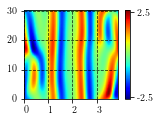

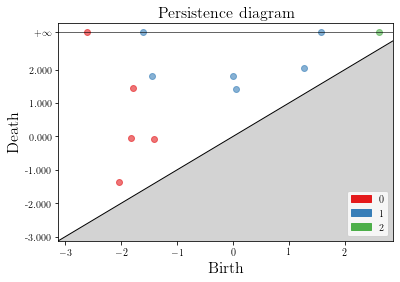

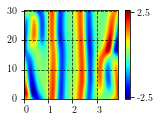

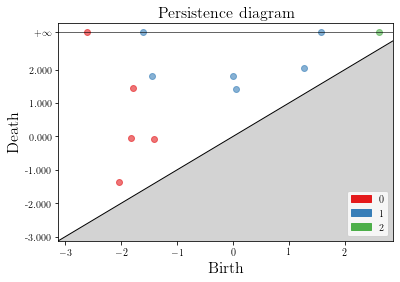

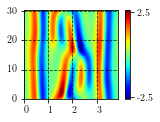

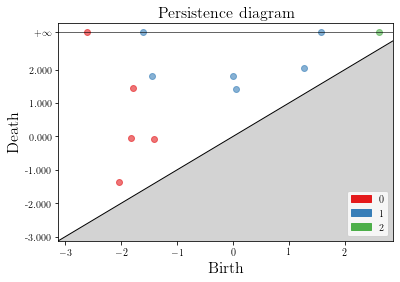

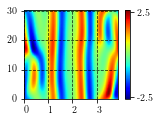

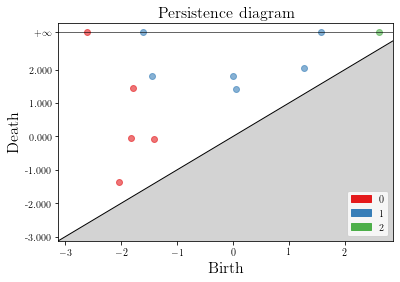

0.0
4.371503159461554e-15
1.565327728547672e-14
1.572266622451579e-14


In [30]:
persistences = []
sr = read_h5('ShiftReflectionOrbitKS_L34p465_T30p451.h5')
group_orbit = [sr, sr.reflection(), sr.cell_shift(axis=1), sr.cell_shift().reflection()]
for orbit in group_orbit:
    orbit.plot(fundamental_domain=False)
    pcc = orbit_periodic_cubical_complex(orbit)
    ps = pcc.persistence(min_persistence=0.5)
    persistences.append([p[-1] for p in ps])
    gudhi_plot(ps, legend=True)
    
for g in group_orbit:
    print(gudhi_distance(group_orbit[0], g, metric='wasserstein'))

In [31]:
?gudhi_plot

In [4]:
orbit_list = []
for orbit_h5 in glob.glob('../data/local/continuation/merge_tile_coarse/*.h5'):
    orbit_list.append(read_h5('../'+orbit_h5))

In [5]:
orbit1 = read_h5('RelativeOrbitKS_L13p093_T9p100.h5', directory='../data/local/continuation/merge_tile/')
orbit2 =  read_h5('RelativeOrbitKS_L12p997_T22p702.h5', directory='../data/local/continuation/merge_tile/')

In [6]:
pcc1 = orbit_periodic_cubical_complex(orbit1)
pcc2 = orbit_periodic_cubical_complex(orbit2)

In [35]:
orbit_list[0].L, orbit_list[-1].L

(12.676959074242161, 13.10028765679849)

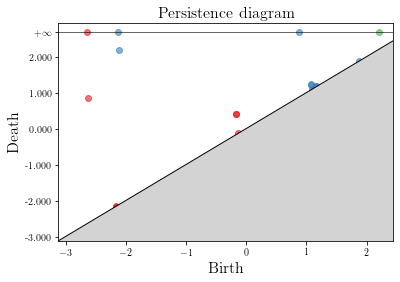

In [7]:
gudhi_plot(pcc1.persistence())

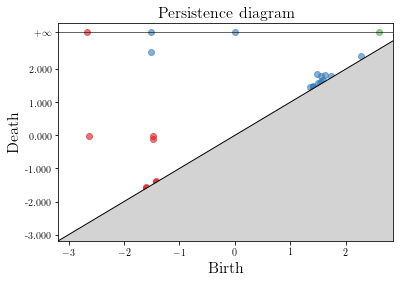

In [8]:
gudhi_plot(pcc2.persistence())

In [12]:
wd_list_bd = []
for orbit1, orbit2 in np.array(list(itertools.product(orbit_list, orbit_list))):
    wd_list_bd.append(gudhi_distance(orbit1, orbit2, metric='bottleneck'))

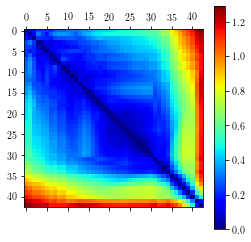

In [13]:
plt.matshow(np.reshape(wd_list_bd, (int(np.sqrt(len(wd_list_bd))), -1)), cmap='jet')
plt.colorbar()
plt.show()

In [14]:
wd_list = []
for orbit1, orbit2 in np.array(list(itertools.product(orbit_list, orbit_list))):
    wd_list.append(gudhi_distance(orbit1, orbit2, metric='wasserstein'))

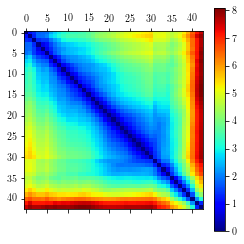

In [15]:
plt.matshow(np.reshape(wd_list, (int(np.sqrt(len(wd_list))), -1)), cmap='jet')
plt.colorbar()
plt.show()

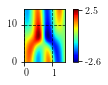

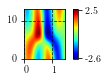

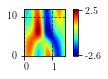

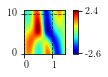

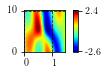

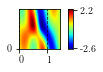

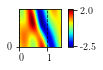

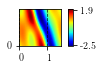

In [22]:
for o in orbit_list[35:]:
    o.plot()
# orbit_list[35].plot(), orbit_list[-1].plot()

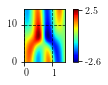

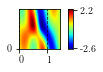

(None, None)

In [20]:
orbit_list[35].plot(), orbit_list[40].plot()